Тангенсы углов наклона:
Для частоты 1.14 МПа: k = 0.494
Для частоты 1.16 МПа: k = 0.397
Для частоты 2.87 МПа: k = 1.035


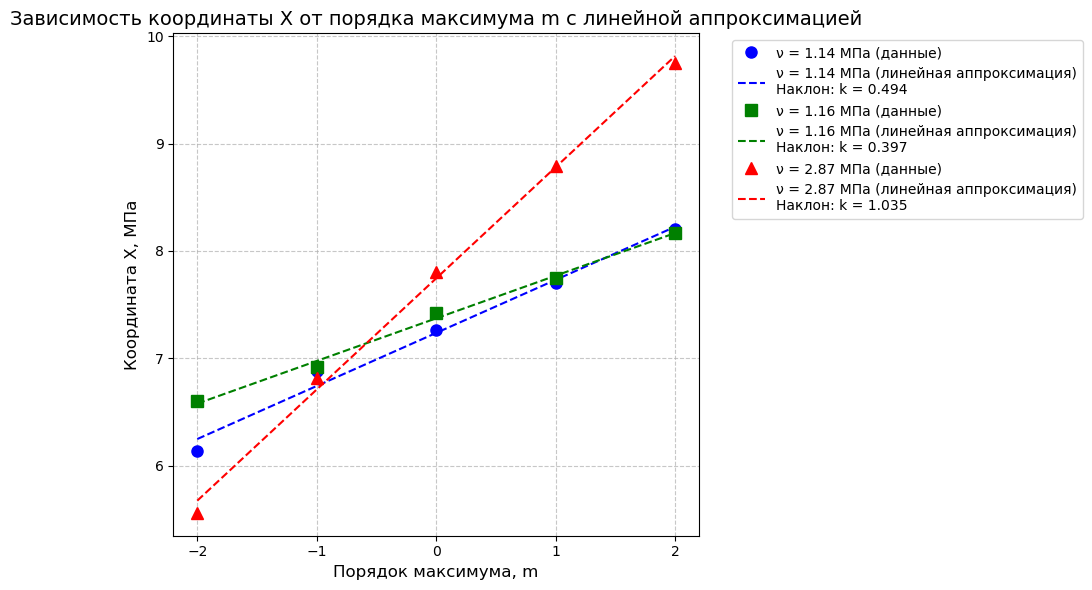

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Данные из таблицы
m = np.array([-2, -1, 0, +1, +2])  # Порядок максимумов
frequencies = [1.14, 1.16, 2.87]    # Частоты в МПа
x_values = {
    1.14: [6.14, 6.88, 7.26, 7.7, 8.2],
    1.16: [6.6, 6.92, 7.42, 7.75, 8.17],
    2.87: [5.56, 6.82, 7.8, 8.79, 9.75]
}

# Создаем график
plt.figure(figsize=(10, 6))

# Цвета и маркеры для каждого графика
colors = ['blue', 'green', 'red']
markers = ['o', 's', '^']

# Для хранения коэффициентов наклона
slopes = {}

for i, (freq, color, marker) in enumerate(zip(frequencies, colors, markers)):
    y = x_values[freq]
    
    # Строим исходные точки
    plt.plot(m, y, color=color, marker=marker, linestyle='', 
             markersize=8, label=f'ν = {freq} МПа (данные)')
    
    # Линейная аппроксимация
    model = np.poly1d(np.polyfit(m, y, 1))
    polyline = np.linspace(min(m), max(m))
    
    # Получаем коэффициенты: model.c[0] - наклон, model.c[1] - intercept
    k = model.c[0]
    b = model.c[1]
    
    # Сохраняем наклон для данной частоты
    slopes[freq] = k
    
    # Строим линию аппроксимации
    plt.plot(polyline, model(polyline), color=color, linestyle='--',
             label=f'ν = {freq} МПа (линейная аппроксимация)\nНаклон: k = {k:.3f}')

# Настройки графика
plt.xlabel('Порядок максимума, m', fontsize=12)
plt.ylabel('Координата X, МПа', fontsize=12)
plt.title('Зависимость координаты X от порядка максимума m с линейной аппроксимацией', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(m)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Выводим коэффициенты наклона
print("Тангенсы углов наклона:")
for freq, k in slopes.items():
    print(f"Для частоты {freq} МПа: k = {k:.3f}")

plt.show()

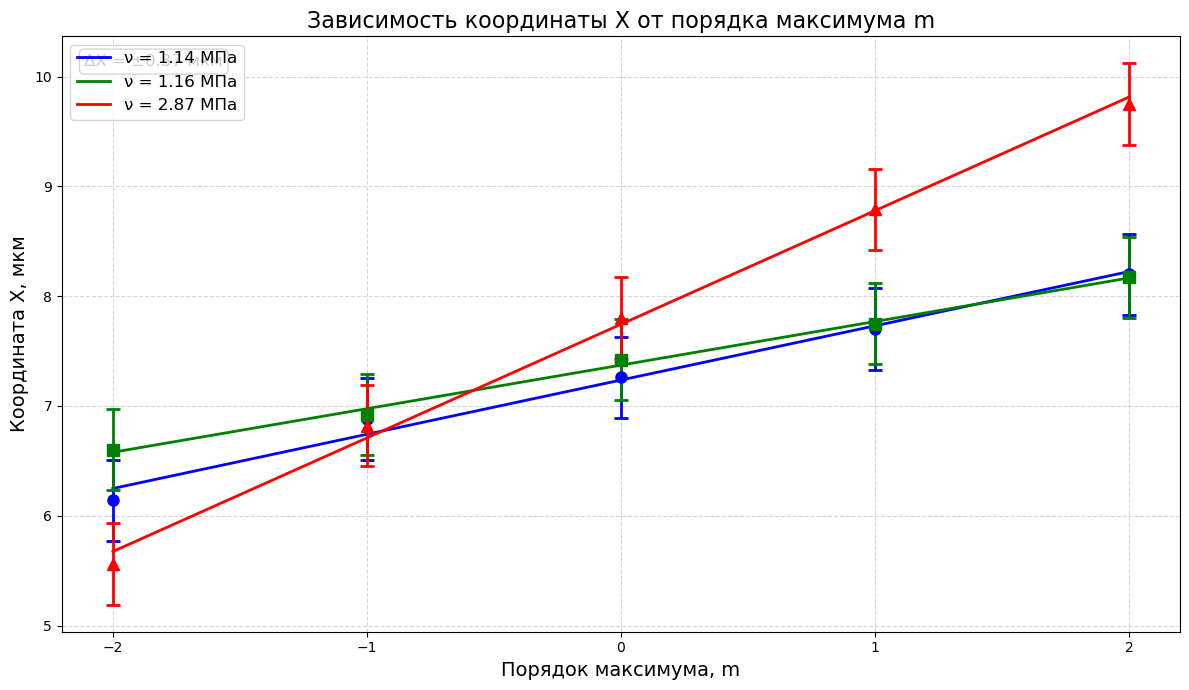

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Данные из таблицы
m = np.array([-2, -1, 0, +1, +2])  # Порядок максимумов
frequencies = [1.14, 1.16, 2.87]    # Частоты в МПа
x_values = {
    1.14: [6.14, 6.88, 7.26, 7.7, 8.2],
    1.16: [6.6, 6.92, 7.42, 7.75, 8.17],
    2.87: [5.56, 6.82, 7.8, 8.79, 9.75]
}

# Погрешность измерения (одинаковая для всех точек)
delta_x = 0.37  # мкм

# Создаем график
plt.figure(figsize=(12, 7))

# Цвета для каждого графика
colors = ['blue', 'green', 'red']
markers = ['o', 's', '^']  # Разные маркеры для каждого графика

for i, (freq, color, marker) in enumerate(zip(frequencies, colors, markers)):
    y = np.array(x_values[freq])
    
    # Линейная аппроксимация
    model = np.poly1d(np.polyfit(m, y, 1))
    polyline = np.linspace(min(m), max(m))
    
    # Строим линию аппроксимации (сплошная)
    plt.plot(polyline, model(polyline), color=color, linestyle='-',
             linewidth=2, label=f'ν = {freq} МПа')
    
    # Строим точки с крестами погрешностей (исправленная строка)
    plt.errorbar(m, y, yerr=delta_x, fmt=marker, color=color, markersize=8,
                 capsize=5, capthick=2, elinewidth=2, markerfacecolor=color)

# Настройки графика
plt.xlabel('Порядок максимума, m', fontsize=14)
plt.ylabel('Координата X, мкм', fontsize=14)
plt.title('Зависимость координаты X от порядка максимума m', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(m)
plt.legend(fontsize=12, loc='upper left')

# Добавляем аннотацию с информацией о погрешности
plt.annotate(f'ΔX = ±{delta_x} мкм', xy=(0.02, 0.95), 
             xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig("./tex/images/fig1.png")

Результаты линейной аппроксимации:
---------------------------------
Для частоты 1.14 МГц:
Тангенс угла наклона (k) = 0.494 ± 0.033
Пересечение с осью Y (b) = 7.236
Коэффициент детерминации R² = 0.987
---------------------------------
Для частоты 1.16 МГц:
Тангенс угла наклона (k) = 0.397 ± 0.014
Пересечение с осью Y (b) = 7.372
Коэффициент детерминации R² = 0.996
---------------------------------
Для частоты 2.87 МГц:
Тангенс угла наклона (k) = 1.035 ± 0.033
Пересечение с осью Y (b) = 7.744
Коэффициент детерминации R² = 0.997
---------------------------------


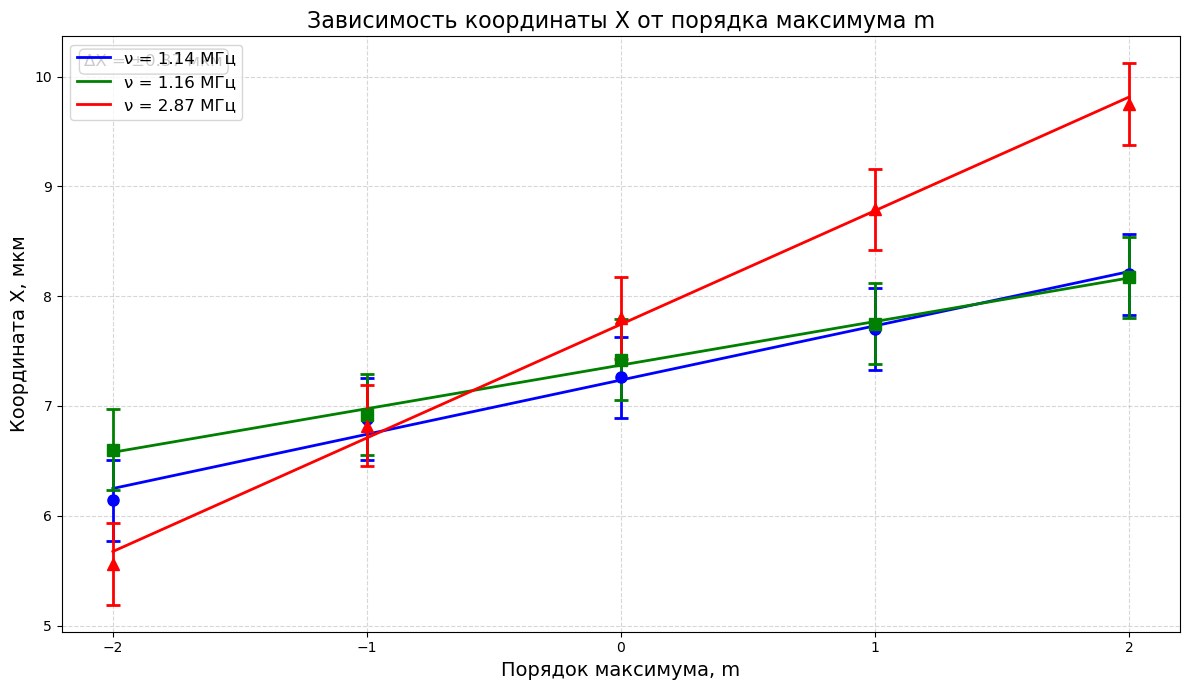

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Данные из таблицы
m = np.array([-2, -1, 0, +1, +2])  # Порядок максимумов
frequencies = [1.14, 1.16, 2.87]    # Частоты в МПа
x_values = {
    1.14: [6.14, 6.88, 7.26, 7.7, 8.2],
    1.16: [6.6, 6.92, 7.42, 7.75, 8.17],
    2.87: [5.56, 6.82, 7.8, 8.79, 9.75]
}

# Погрешность измерения (одинаковая для всех точек)
delta_x = 0.37  # мкм

# Функция для линейной регрессии
def linear_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x2 = np.sum(x**2)
    
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    intercept = (sum_y - slope * sum_x) / n
    
    # Расчет стандартных ошибок
    y_pred = slope * x + intercept
    residuals = y - y_pred
    std_err = np.sqrt(np.sum(residuals**2) / (n - 2)) / np.sqrt(np.sum((x - np.mean(x))**2))
    
    return slope, intercept, std_err

# Создаем график
plt.figure(figsize=(12, 7))

# Цвета и маркеры для каждого графика
colors = ['blue', 'green', 'red']
markers = ['o', 's', '^']

print("Результаты линейной аппроксимации:")
print("---------------------------------")

for i, (freq, color, marker) in enumerate(zip(frequencies, colors, markers)):
    y = np.array(x_values[freq])
    
    # Линейная аппроксимация
    slope, intercept, std_err = linear_regression(m, y)
    
    # Коэффициент детерминации R²
    y_pred = slope * m + intercept
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Строим линию аппроксимации
    polyline = np.linspace(min(m), max(m))
    plt.plot(polyline, intercept + slope*polyline, color=color, linestyle='-',
             linewidth=2, label=f'ν = {freq} МГц')
    
    # Строим точки с крестами погрешностей
    plt.errorbar(m, y, yerr=delta_x, fmt=marker, color=color, markersize=8,
                 capsize=5, capthick=2, elinewidth=2, markerfacecolor=color)
    
    # Выводим параметры аппроксимации
    print(f"Для частоты {freq} МГц:")
    print(f"Тангенс угла наклона (k) = {slope:.3f} ± {std_err:.3f}")
    print(f"Пересечение с осью Y (b) = {intercept:.3f}")
    print(f"Коэффициент детерминации R² = {r_squared:.3f}")
    print("---------------------------------")

# Настройки графика
plt.xlabel('Порядок максимума, m', fontsize=14)
plt.ylabel('Координата X, мкм', fontsize=14)
plt.title('Зависимость координаты X от порядка максимума m', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(m)
plt.legend(fontsize=12, loc='upper left')

# Добавляем аннотацию с информацией о погрешности
plt.annotate(f'ΔX = ±{delta_x} мкм', xy=(0.02, 0.95), 
             xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()